# COMP30760, Assignment 2
# by Muhammad Khan, 21338981

In this assignment i will collect data from a customer dataset from a TV and broadband telecommunications company and then perform a number of data analysis tasks on this data: 
1)initial data characterisation and preprocessing
2)data analysis
3)regression and classification

In [54]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

# scraping the data using pandas to read in the csv for the customer data and save data in customerData
customerData = pd.read_csv("http://mlg.ucd.ie/modules/COMP30760/assignment2/21338981.csv")
customerData # displaying the information to check if it worked 

,customer_id,age,location,gender,credit_score,membership_length,balance,payment_method,num_products,has_broadband,has_tv,broadband_bundle,tv_bundle,num_support_calls,churn
0,44821,30.0,Leinster,F,576,64,0.0000,DirectDebit,2,True,True,1GB,Premium,2,0
1,84644,36.0,Munster,Female,617,1,596.8100,CreditCard,2,True,True,1GB,Premium,0,0
2,39096,33.0,Ulster,Male,690,67,498.1400,DirectDebit,2,True,True,500Mbps,Premium,2,0
3,80604,42.0,Connacht,Female,552,78,0.0000,DirectDebit,2,True,True,2GB,Basic,0,0
4,65575,NaN,Leinster,Male,450,107,531.5900,CreditCard,2,True,True,500Mbps,Basic,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,81104,50.0,Munster,Male,537,101,570.9750,DD,3,True,True,2GB,Basic,0,1
1509,89077,36.0,Leinster,Male,579,36,0.0000,CreditCard,1,True,False,500Mbps,NaN,7,1
1510,35893,44.0,Munster,F,665,1,567.0100,DirectDebit,1,True,False,2GB,NaN,3,1
1511,49799,50.0,Munster,Female,743,68,578.8500,CreditCard,1,False,True,NaN,Premium,0,1


# Task 1: Data Characterisation and Preprocessing
Let us explore the dataset:

In [55]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1513 non-null   int64  
 1   age                1492 non-null   float64
 2   location           1513 non-null   object 
 3   gender             1513 non-null   object 
 4   credit_score       1513 non-null   int64  
 5   membership_length  1513 non-null   int64  
 6   balance            1513 non-null   float64
 7   payment_method     1468 non-null   object 
 8   num_products       1513 non-null   int64  
 9   has_broadband      1513 non-null   bool   
 10  has_tv             1513 non-null   bool   
 11  broadband_bundle   1107 non-null   object 
 12  tv_bundle          1049 non-null   object 
 13  num_support_calls  1513 non-null   int64  
 14  churn              1513 non-null   int64  
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 156.7+ KB


In [56]:
# Display the first few rows of the dataset
print(customerData.head())


   customer_id   age  location  gender  credit_score  membership_length  \
0        44821  30.0  Leinster       F           576                 64   
1        84644  36.0   Munster  Female           617                  1   
2        39096  33.0    Ulster    Male           690                 67   
3        80604  42.0  Connacht  Female           552                 78   
4        65575   NaN  Leinster    Male           450                107   

   balance payment_method  num_products  has_broadband  has_tv  \
0     0.00    DirectDebit             2           True    True   
1   596.81     CreditCard             2           True    True   
2   498.14    DirectDebit             2           True    True   
3     0.00    DirectDebit             2           True    True   
4   531.59     CreditCard             2           True    True   

  broadband_bundle tv_bundle  num_support_calls  churn  
0              1GB   Premium                  2      0  
1              1GB   Premium          

In [57]:
# Descriptive statistics
print(customerData.describe())


        customer_id          age  credit_score  membership_length  \
count   1513.000000  1492.000000   1513.000000        1513.000000   
mean   49229.391937    38.980563    629.346993          52.430932   
std    28950.758166    10.637318    105.485558          35.864134   
min        7.000000    18.000000    286.000000           1.000000   
25%    24138.000000    32.000000    556.000000          23.000000   
50%    48182.000000    37.000000    629.000000          50.000000   
75%    73244.000000    45.000000    705.000000          82.000000   
max    99927.000000    85.000000    881.000000         130.000000   

           balance  num_products  num_support_calls        churn  
count  1513.000000   1513.000000        1513.000000  1513.000000  
mean    403.028751      1.491077           1.572373     0.399868  
std     312.891539      0.635236           2.267543     0.490033  
min      -1.000000      1.000000          -1.000000     0.000000  
25%       0.000000      1.000000           

Now we will identify any issues with the data, including missing values,duplicates, etc:

In [58]:
#get missing values
missing_values = customerData.isnull()

#get missing values in each column
missing_values_count = customerData.isnull().sum()

#get missing values in entire dataframe
total_missing_values = missing_values.sum().sum()

#Print results
print("Missing Values in DataFrame:")
print(missing_values)

print("\nMissing Values Count in Each Column:")
print(missing_values_count)

print("\nTotal Missing Values in DataFrame:", total_missing_values)

Missing Values in DataFrame:
      customer_id    age  location  gender  credit_score  membership_length  \
0           False  False     False   False         False              False   
1           False  False     False   False         False              False   
2           False  False     False   False         False              False   
3           False  False     False   False         False              False   
4           False   True     False   False         False              False   
...           ...    ...       ...     ...           ...                ...   
1508        False  False     False   False         False              False   
1509        False  False     False   False         False              False   
1510        False  False     False   False         False              False   
1511        False  False     False   False         False              False   
1512        False  False     False   False         False              False   

      balance  payment

Here we can see that the "age", "payment_method","broadband_bundle","tv_bundle" columns have missing values. Let us fix these missing values.

To fix the issue of missing values in the "age" column, we will take the mean of the ages and fill the missing values in with the mean:

In [59]:
def fillNa(df):
    mean_age_rounded = math.ceil(customerData['age'].mean())
    df['age'].fillna((mean_age_rounded), inplace=True)
    return df

customerData = fillNa(customerData)

To fix the issue of missing values in the "payment method" column, we will fill missing payment method values with the most frequent payment method:

In [60]:
# Fill missing values in 'payment_method' with the most frequent payment method
most_frequent_payment_method = customerData['payment_method'].mode()[0]
customerData['payment_method'].fillna(most_frequent_payment_method, inplace=True)


For categorical variables like 'broadband_bundle' and 'tv_bundle', we can fill missing values with a default category or the most frequent category:

In [61]:
most_frequent_broadband_bundle = customerData['broadband_bundle'].mode()[0]
most_frequent_tv_bundle = customerData['tv_bundle'].mode()[0]

customerData['broadband_bundle'].fillna(most_frequent_broadband_bundle, inplace=True)
customerData['tv_bundle'].fillna(most_frequent_tv_bundle, inplace=True)


In [62]:
#check again for missing values
print(customerData.isnull().sum())


customer_id          0
age                  0
location             0
gender               0
credit_score         0
membership_length    0
balance              0
payment_method       0
num_products         0
has_broadband        0
has_tv               0
broadband_bundle     0
tv_bundle            0
num_support_calls    0
churn                0
dtype: int64


After double-checking, we can now see that there are no missing values. 
.
.
.
.
.


In [63]:
customerData


,customer_id,age,location,gender,credit_score,membership_length,balance,payment_method,num_products,has_broadband,has_tv,broadband_bundle,tv_bundle,num_support_calls,churn
0,44821,30.0,Leinster,F,576,64,0.0000,DirectDebit,2,True,True,1GB,Premium,2,0
1,84644,36.0,Munster,Female,617,1,596.8100,CreditCard,2,True,True,1GB,Premium,0,0
2,39096,33.0,Ulster,Male,690,67,498.1400,DirectDebit,2,True,True,500Mbps,Premium,2,0
3,80604,42.0,Connacht,Female,552,78,0.0000,DirectDebit,2,True,True,2GB,Basic,0,0
4,65575,39.0,Leinster,Male,450,107,531.5900,CreditCard,2,True,True,500Mbps,Basic,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,81104,50.0,Munster,Male,537,101,570.9750,DD,3,True,True,2GB,Basic,0,1
1509,89077,36.0,Leinster,Male,579,36,0.0000,CreditCard,1,True,False,500Mbps,Premium,7,1
1510,35893,44.0,Munster,F,665,1,567.0100,DirectDebit,1,True,False,2GB,Premium,3,1
1511,49799,50.0,Munster,Female,743,68,578.8500,CreditCard,1,False,True,1GB,Premium,0,1


In [64]:
# Check for duplicates in each column
for col in customerData.columns:
    num_duplicates = customerData[col].duplicated().sum()
    print(f"Column '{col}' has {num_duplicates} duplicated values.")


Column 'customer_id' has 0 duplicated values.
Column 'age' has 1451 duplicated values.
Column 'location' has 1509 duplicated values.
Column 'gender' has 1507 duplicated values.
Column 'credit_score' has 1077 duplicated values.
Column 'membership_length' has 1419 duplicated values.
Column 'balance' has 506 duplicated values.
Column 'payment_method' has 1509 duplicated values.
Column 'num_products' has 1509 duplicated values.
Column 'has_broadband' has 1511 duplicated values.
Column 'has_tv' has 1511 duplicated values.
Column 'broadband_bundle' has 1510 duplicated values.
Column 'tv_bundle' has 1511 duplicated values.
Column 'num_support_calls' has 1501 duplicated values.
Column 'churn' has 1511 duplicated values.


We can see here that a few of the columns actually have duplicated values. However, using some logic we can see that alot of people will have the same age, location, and gender, etc. So we ignore the duplicate values in this assignment.


# Task 2: Data Analysis

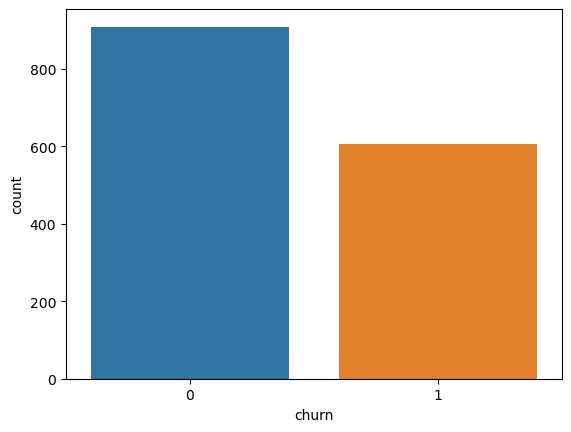

In [85]:
sns.countplot(data=customerData, x='churn')
plt.show()

Here we can see that churn is a binary target variable. The above countplot shows us the number of different values of churn and their count

# a) Numeric Features

C:\conda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


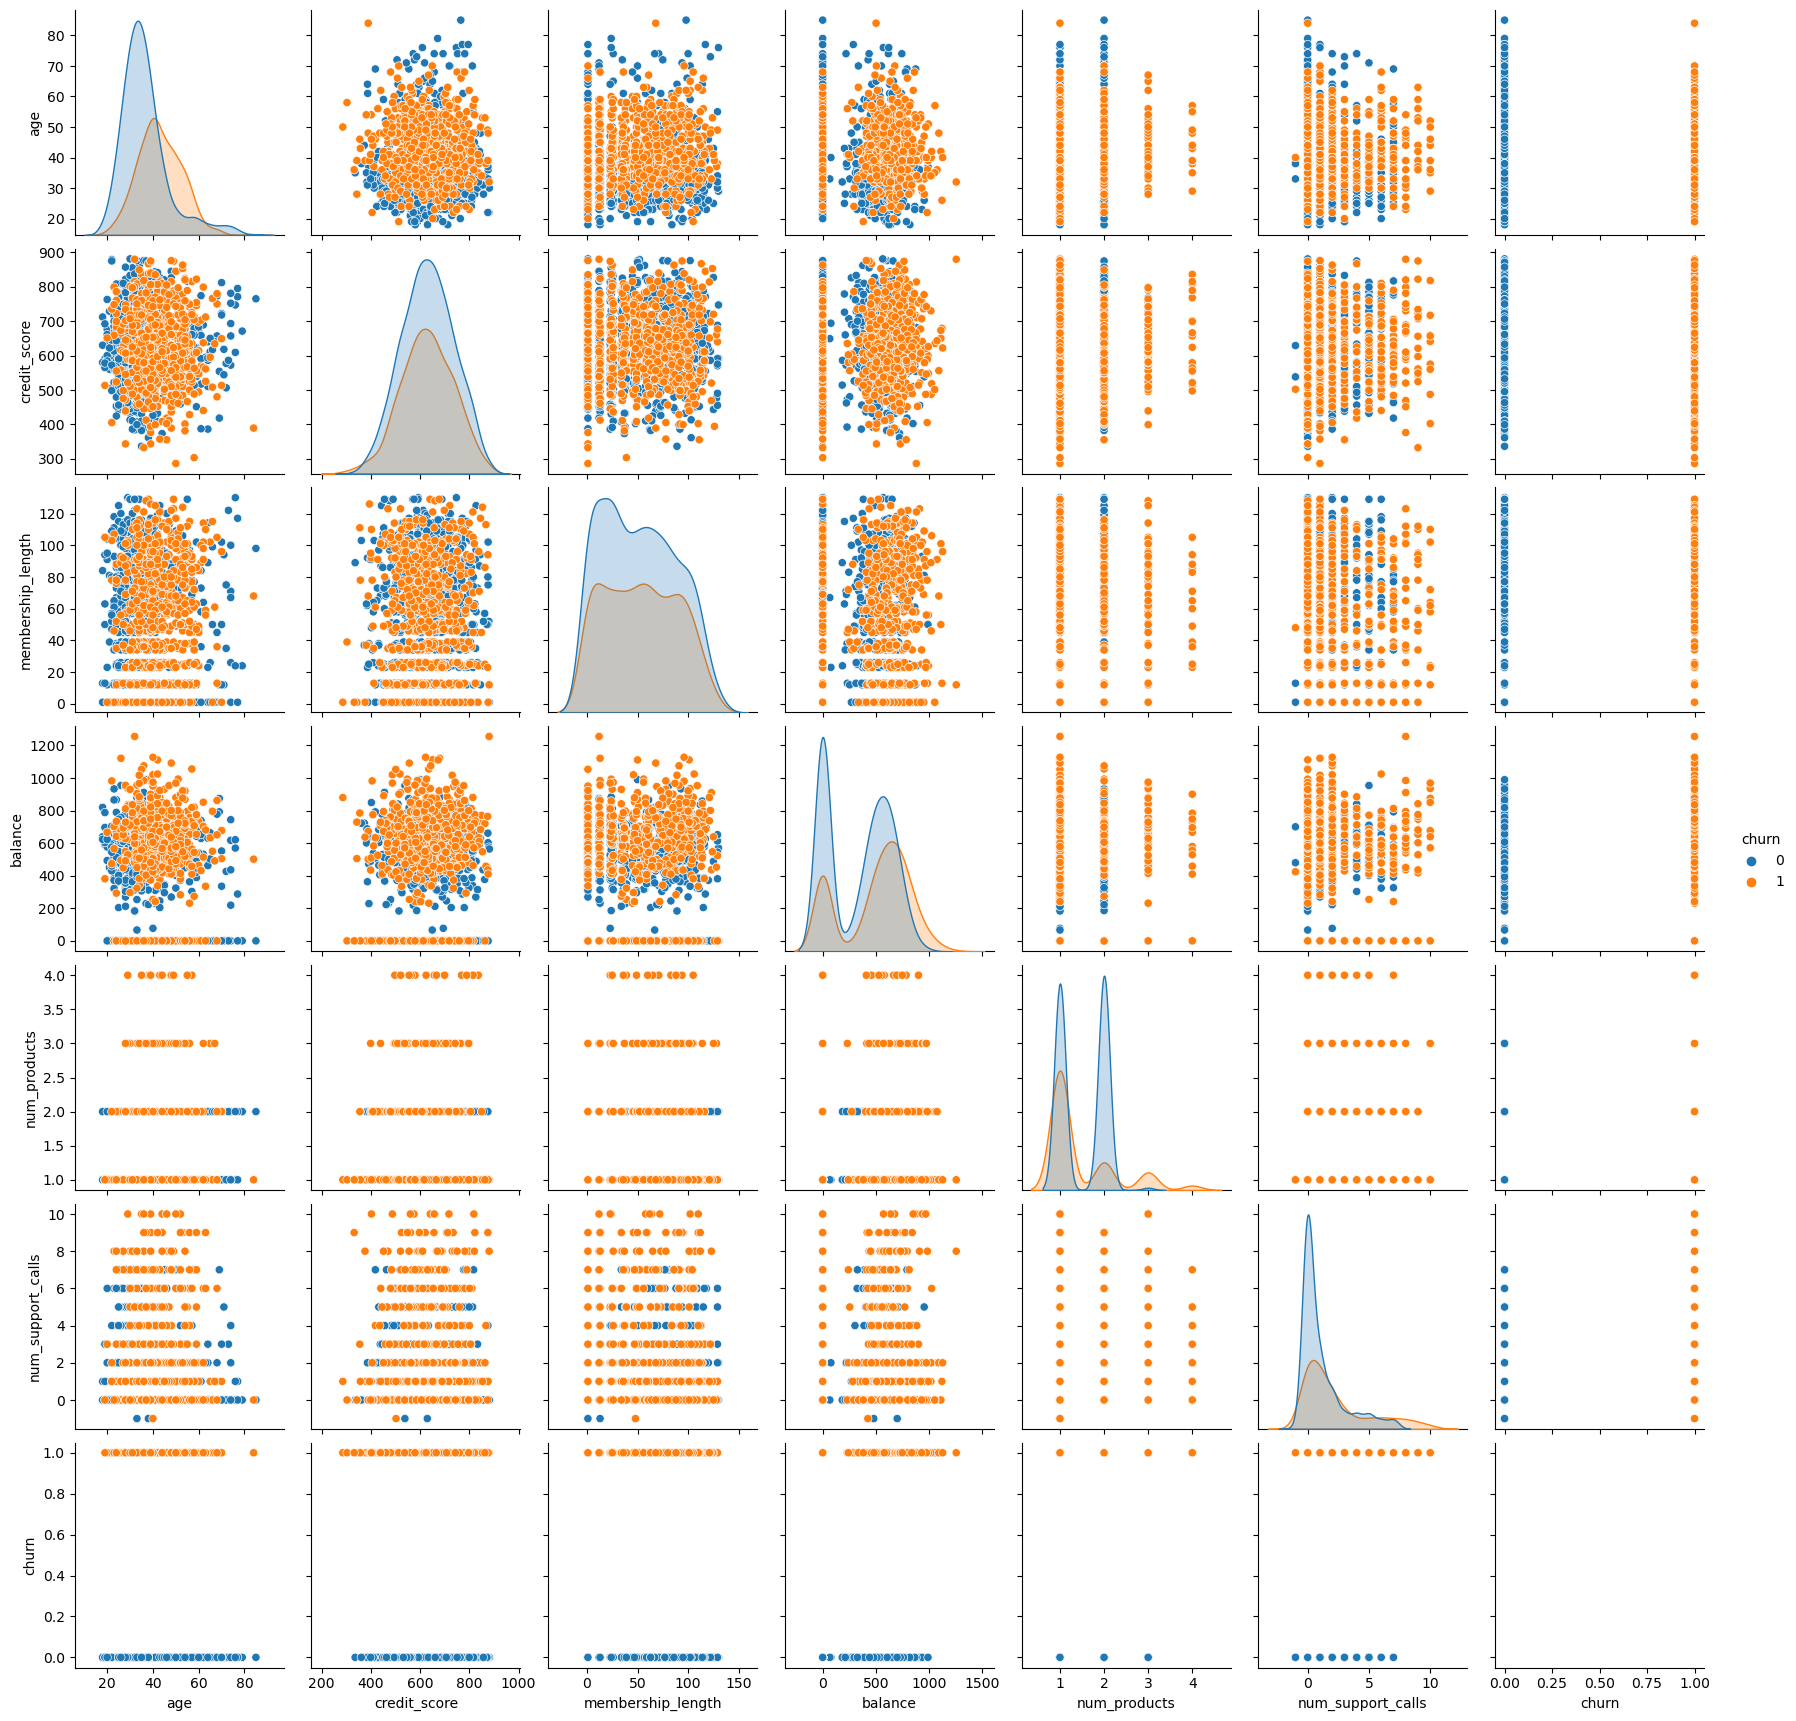

In [52]:
# Plot numeric features against the target 'churn'
sns.pairplot(customerData, hue='churn', vars=customerData.select_dtypes(include='number'))
plt.show()

Here we can see the very bottom row showing the relationship between churn and all the features. However it isnt very clear. For the numerical features:
We can see that for age we cannot really infer anything from the data. 

To analyse the numeric variables, we will drop some of the categorical columns and make a new dataframe for now.

In [76]:
#dropped customer_id and categorical columns as it wont help us in analysis
columns_to_drop = ['customer_id', 'broadband_bundle', 'tv_bundle','payment_method', 'location', 'has_broadband', 'has_tv', 'gender']

customerNumData = customerData.drop(columns=columns_to_drop, axis=1)

print(customerNumData)

       age  credit_score  membership_length   balance  num_products  \
0     30.0           576                 64    0.0000             2   
1     36.0           617                  1  596.8100             2   
2     33.0           690                 67  498.1400             2   
3     42.0           552                 78    0.0000             2   
4     39.0           450                107  531.5900             2   
...    ...           ...                ...       ...           ...   
1508  50.0           537                101  570.9750             3   
1509  36.0           579                 36    0.0000             1   
1510  44.0           665                  1  567.0100             1   
1511  50.0           743                 68  578.8500             1   
1512  39.0           624                 88  747.7625             4   

      num_support_calls  churn  
0                     2      0  
1                     0      0  
2                     2      0  
3              

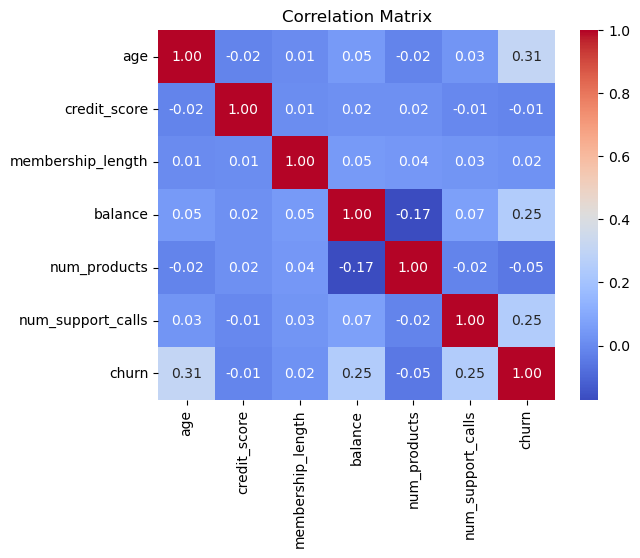

In [77]:
# Calculate correlation matrix
correlation_matrix = customerNumData.corr()

# Display a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Positive or negative correlations can indicate how strongly a feature is related to the churn variable. We see at the very bottom row the correlation between churn and the numerical features.We can see that credit_score, membership_length, num_products, have a correlation close to 0 with regards to churn. This implies that there is no strong linear association between these numeric features and and the likelihood of churn. On the other hand, age, balance,num_support_calls are further than 0 than the other numeric features. This means that there is a stronger positive linear relationship compared to the other numeric features. We can conclude that as the value of these numeric features increases, the likelihood of churn also increases

We can also get boxplots to analyse the relationship between churn and the numeric features:

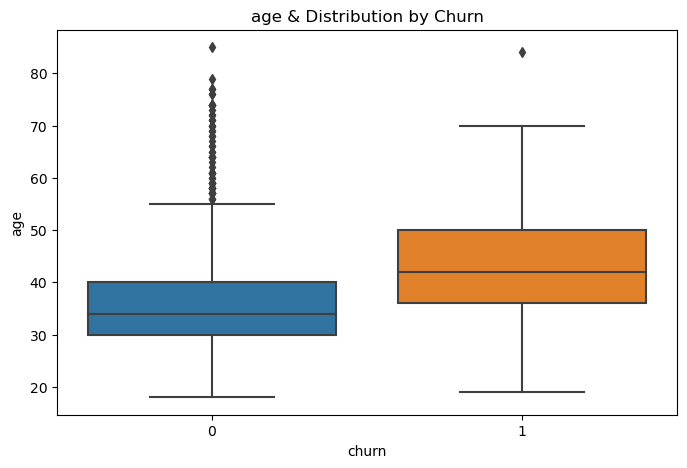

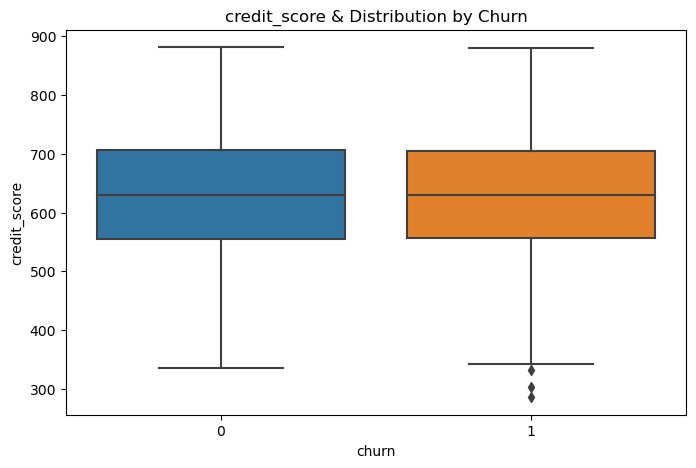

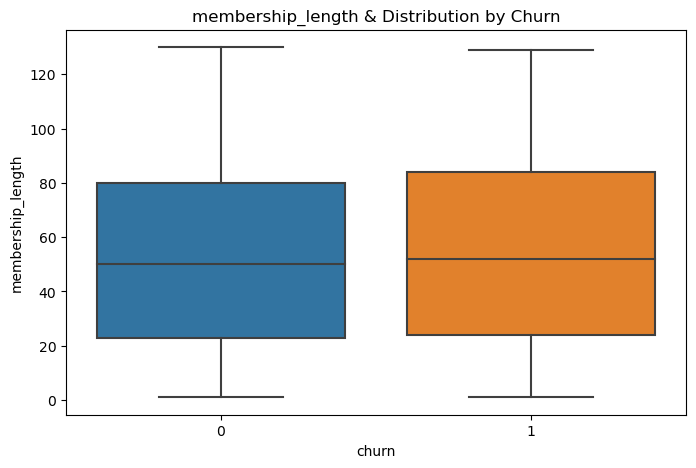

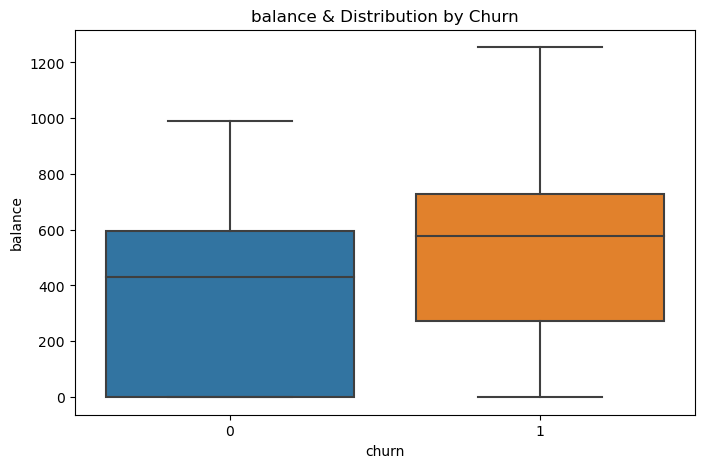

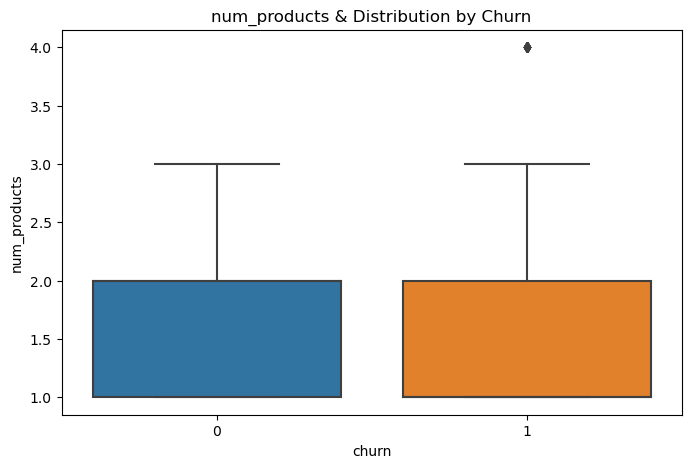

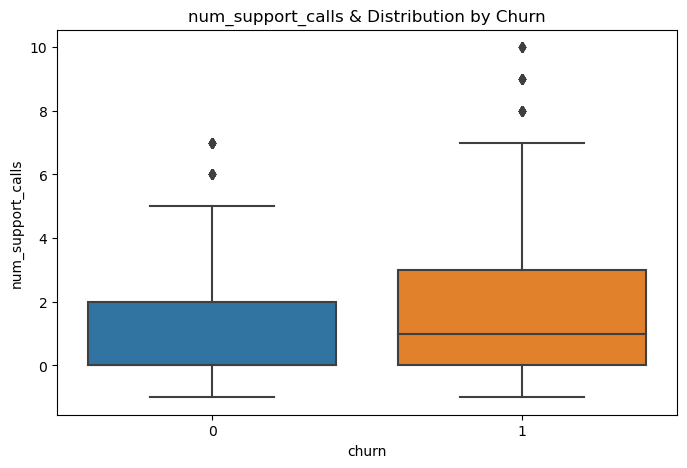

In [86]:
numericFeatures = ['age', 'credit_score','membership_length', 'balance', 'num_products', 'num_support_calls']

# Plot individual box plots for each numeric feature against 'churn'
for feature in numericFeatures:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='churn', y=feature, data=customerNumData)
    plt.title(f'{feature} & Distribution by Churn')
    plt.show()


Age & Churn: We can see that people aged 30 to 40 years old are the majority of people with churn 0, meaning that they are more likely to stay. People aged 35-50 are more likely to leave, as they have churn 1.

Credit Score & Churn: Both churns have an equal possibility, meaning that credit score does not impact churn too much.

Membership Length & Churn: Both churns have an equal possibility, meaning that membership length does not impact churn too much.

Balance & Churn: We can see that people with a balance of 0 to 600 are likely to stay. While people with a balance of 300 to 700 
are more likely to leave. This could be due to the fact that people have higher amounts to pay, and may not be happy with the pricing of the company and are likely to leave the company

num_products & Churn: Both churns have an equal possibility, meaning that number of productsdoes not impact churn too much.

Number of Support Calls & Churn: People with less support calls (0-2) are more likely to stay with the compnay, and people with more calls(0-3) are more likely to leave, indicating good customer service is important for retention. 








# b) Categorical Features

Now we need to make a new dataframe with just the categorical variables.

In [88]:
#dropped customer_id and categorical columns as it wont help us in analysis
columns_to_drop2 = ['age', 'credit_score', 'membership_length', 'balance', 'num_products', 'num_support_calls']

customerCatData = customerData.drop(columns=columns_to_drop2, axis=1)

print(customerCatData)

      customer_id  location  gender payment_method  has_broadband  has_tv  \
0           44821  Leinster       F    DirectDebit           True    True   
1           84644   Munster  Female     CreditCard           True    True   
2           39096    Ulster    Male    DirectDebit           True    True   
3           80604  Connacht  Female    DirectDebit           True    True   
4           65575  Leinster    Male     CreditCard           True    True   
...           ...       ...     ...            ...            ...     ...   
1508        81104   Munster    Male             DD           True    True   
1509        89077  Leinster    Male     CreditCard           True   False   
1510        35893   Munster       F    DirectDebit           True   False   
1511        49799   Munster  Female     CreditCard          False    True   
1512        80472   Munster    Male     CreditCard           True    True   

     broadband_bundle tv_bundle  churn  
0                 1GB   Premium   

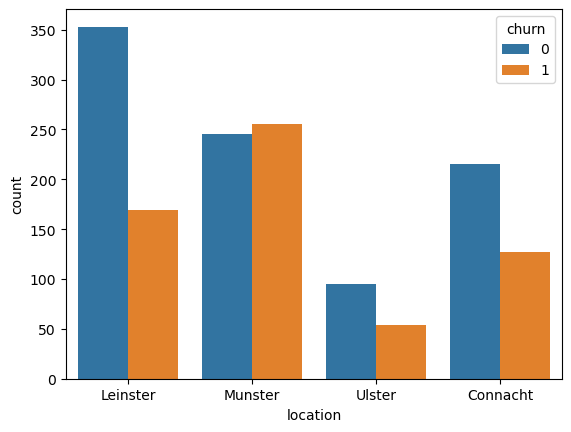

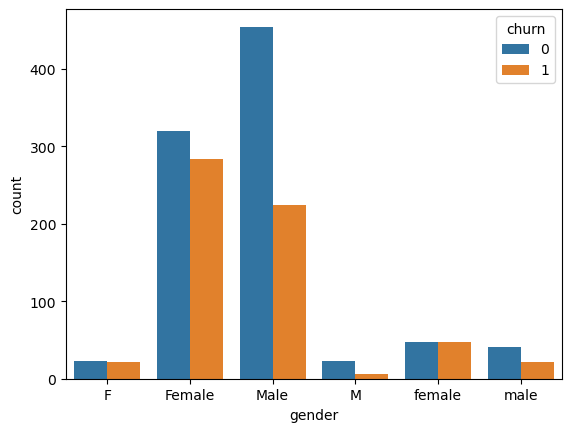

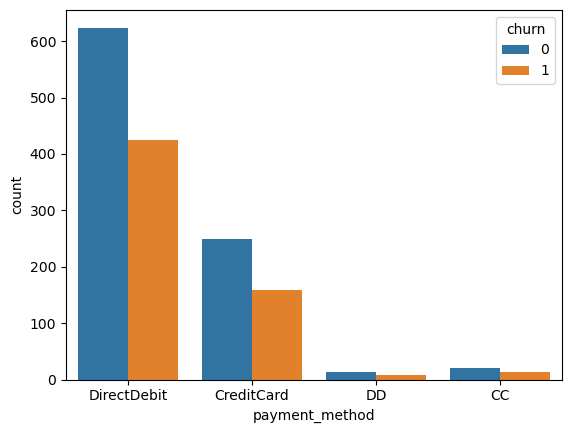

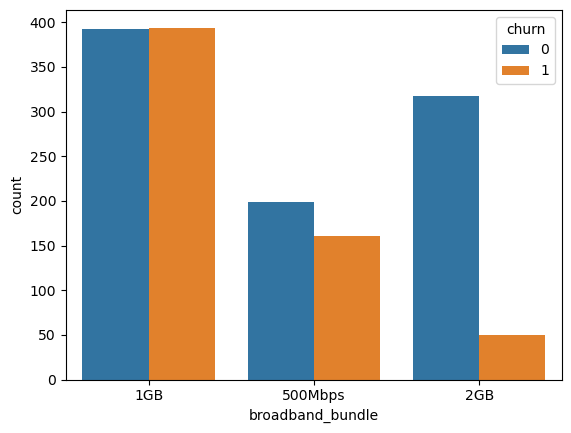

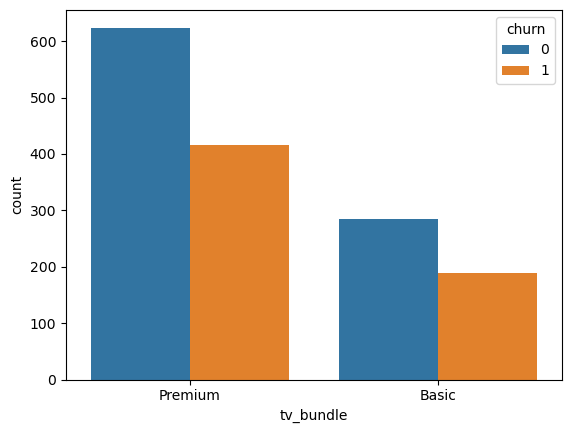

In [92]:
# Plot categorical features against the target 'churn'
for categoricalFeature in customerCatData.select_dtypes(include='object'):
    sns.countplot(x=categoricalFeature, hue='churn', data=customerCatData)
    plt.show()

Location: We can see that people in Leinster are most likely to stay with the service rather than leave it. We can say the same for Ulster and Connacht. From my knowledge, Leinster seems to be the most urban area so that means people would need better internet connections more than other people. People in Munster are more likely to leave the service than stay with it.

Gender: The common trend here is that both males and females are more likely to stay with the company, however it isnt a good indicator so we disregard gender for this.

Payment Method: Again the trend here is that all forms of payment are more likely to stay. But we can see here that most people use direct debit as a form of payment.

Broadband Bundle: We can see here that people who buy 1GB of data are equally as likely to stay with the service than leave the service. But people who buy 500 Mbps and 2GB of data are more likely to stay with the service rather than leave.

TV Bundle: Here we can see that people with both premium and Basic bundles are more likely to stay with the service than leave

# c) Conclusion:

I would conclude that the features which obviously contribute to customers cancelling their subscriptions are: 

# Age:
We can see that people aged 30 to 40 years old are the majority of people with churn 0, meaning that they are more likely to stay. People aged 35-50 are more likely to leave, as they have churn 1.

# Balance:
We can see that people with a balance of 0 to 600 are likely to stay. While people with a balance of 300 to 700 are more likely to leave. This could be due to the fact that people have higher amounts to pay, and may not be happy with the pricing of the company and are likely to leave the company

# Number of Support Calls: 
People with less support calls (0-2) are more likely to stay with the compnay, and people with more calls(0-3) are more likely to leave, indicating good customer service is important for retention

# Location:
We can see that people in Leinster are most likely to stay with the service rather than leave it. We can say the same for Ulster and Connacht.People in Munster are more likely to leave the service than stay with it.

# Broadband bundle: 
We can see here that people who buy 1GB of data are equally as likely to stay with the service than leave the service. But people who buy 500 Mbps and 2GB of data are more likely to stay with the service rather than leave.




# Task 3: Classification

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = customerData.drop('churn', axis=1)
y = customerData['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include='number'))
X_test_scaled = scaler.transform(X_test.select_dtypes(include='number'))

# Build and train models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

model_lr.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [100]:
# Make predictions
predLr = model_lr.predict(X_test_scaled)
predRf = model_rf.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, predLr))
print("Random Forest:")
print(classification_report(y_test, predRf))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       175
           1       0.63      0.52      0.57       128

    accuracy                           0.67       303
   macro avg       0.66      0.65      0.65       303
weighted avg       0.66      0.67      0.66       303

Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       175
           1       0.71      0.70      0.70       128

    accuracy                           0.75       303
   macro avg       0.75      0.74      0.75       303
weighted avg       0.75      0.75      0.75       303



# Logistic Regression:

Precision for class 0 (not churn) is 0.69, indicating that among the instances predicted as not churn, 69% were actually not churn.
Precision for class 1 (churn) is 0.63, meaning that among the instances predicted as churn, 63% were actually churn.


Recall for class 0 is 0.77, indicating that the model correctly identified 77% of the actual not churn instances.
Recall for class 1 is 0.52, meaning that the model only identified 52% of the actual churn instances.

The F1-score is the harmonic mean of precision and recall. The weighted average F1-score is 0.66, providing a balance between precision and recall.

The overall accuracy of the model is 0.67, meaning it correctly predicted the class labels for 67% of the instances.

# Random Forest:

Precision for class 0 is 0.78, indicating that among the instances predicted as not churn, 78% were actually not churn.
Precision for class 1 is 0.71, meaning that among the instances predicted as churn, 71% were actually churn.

Recall for class 0 is 0.79, indicating that the model correctly identified 79% of the actual not churn instances.
Recall for class 1 is 0.70, meaning that the model identified 70% of the actual churn instances.

The weighted average F1-score is 0.75, reflecting a good balance between precision and recall.

The overall accuracy of the Random Forest model is 0.75, meaning it correctly predicted the class labels for 75% of the instances.

# Conclusion: 
The Random Forest model generally outperforms the Logistic Regression model in terms of precision, recall, F1-score, and accuracy. 
Both models have a little bit of a tradeoff between precision and recall. A higher precision sacrifices some recall, and vice versa as well.



END OF ASSIGNMENT